In [32]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow import keras 
from tensorflow.keras import layers

In [33]:
def input_func(x): return x % 10

In [34]:
raw_input = [i for i in range(1000)]
raw_output = [input_func(i) for i in raw_input]

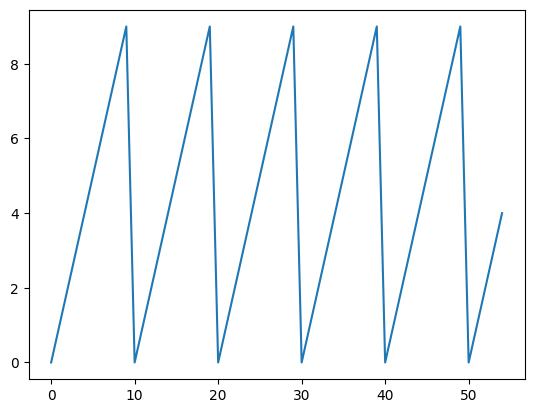

In [35]:
plt.plot(raw_input, raw_output)
plt.show()

In [36]:
df = pd.DataFrame({
    "Input" : raw_input,
    "Output" : raw_output
})

dataset = df.copy()
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("Output")
test_labels = test_features.pop("Output")

In [39]:
model = keras.Sequential(
    [
        layers.Dense(64, activation='relu', input_shape=(1, )),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation="softmax")
    ]
)

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.1)
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)
history = model.fit(train_features, 
                    train_labels, 
                    batch_size=10, 
                    epochs=10, 
                    verbose=1, 
                    validation_split=0.2,
                    validation_data=(test_features, test_labels))

Epoch 1/10


c:\Users\Alaric\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/5 [=====>........................] - ETA: 10s - loss: 3.0929 - accuracy: 0.1000

c:\Users\Alaric\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 [==============================] - 3s 129ms/step - loss: 26.2408 - accuracy: 0.0455 - val_loss: 2.6552 - val_accuracy: 0.0909
Epoch 2/10
5/5 [==============================] - 0s 32ms/step - loss: 2.3955 - accuracy: 0.0909 - val_loss: 2.4726 - val_accuracy: 0.0909
Epoch 3/10
5/5 [==============================] - 0s 31ms/step - loss: 2.3165 - accuracy: 0.1136 - val_loss: 2.4152 - val_accuracy: 0.0909
Epoch 4/10
5/5 [==============================] - 0s 30ms/step - loss: 2.3068 - accuracy: 0.1136 - val_loss: 2.5490 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 27ms/step - loss: 2.2926 - accuracy: 0.1364 - val_loss: 2.5859 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 25ms/step - loss: 2.2888 - accuracy: 0.1136 - val_loss: 2.6196 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 0s 32ms/step - loss: 2.2971 - accuracy: 0.1136 - val_loss: 2.5063 - val_accuracy: 0.0000e+00
Epoch 8/10
5/5 [====

In [38]:
history